In [18]:
import os
import pandas as pd
import hddm
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load data
data = hddm.load_csv('ddm_combine.csv')
data.rt = data.rt/1000
data.response = 1-data.response
data = hddm.utils.flip_errors(data)

In [10]:
data.head(10)

,subj_idx,race,outSold,rt,response,stim,stimulus,type,sold,subj_race,com_stim
0,1,Asian,2,10.487,1,tree,tree,Neutral,low,same,Tree
1,1,Asian,9,7.559,1,male,face,Neutral,high,same,Neutral
2,1,Asian,4,2.918,1,tree,tree,Neutral,low,same,Tree
3,1,Asian,2,3.144,1,tree,tree,Neutral,low,same,Tree
4,1,Asian,9,3.106,1,male,face,Neutral,high,same,Neutral
5,1,Asian,1,1.828,1,male,face,Neutral,low,same,Neutral
6,1,Asian,5,-2.010,0,female,face,Neutral,low,same,Neutral
7,1,Asian,7,-2.824,0,female,face,Neutral,high,same,Neutral
8,1,Asian,1,-1.966,0,tree,tree,Neutral,low,same,Tree
9,1,Asian,10,2.273,1,male,face,Neutral,high,same,Neutral


In [11]:
data

,subj_idx,race,outSold,rt,response,stim,stimulus,type,sold,subj_race,com_stim
0,1,Asian,2,10.487,1,tree,tree,Neutral,low,same,Tree
1,1,Asian,9,7.559,1,male,face,Neutral,high,same,Neutral
2,1,Asian,4,2.918,1,tree,tree,Neutral,low,same,Tree
3,1,Asian,2,3.144,1,tree,tree,Neutral,low,same,Tree
4,1,Asian,9,3.106,1,male,face,Neutral,high,same,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
49851,779,Caucasian,3,0.567,1,male,face,Pain,low,same,Pain
49852,779,Caucasian,10,0.709,1,tree,tree,Pain,high,same,Tree
49853,779,Caucasian,7,0.703,1,male,face,Pain,high,same,Pain
49854,779,Caucasian,5,0.661,1,tree,tree,Pain,low,same,Tree


In [12]:
m = hddm.HDDM(data, depends_on={'v': ['com_stim','subj_race'], 'a': ['com_stim','subj_race'], 'z': ['com_stim','subj_race']}, bias = True, p_outlier=.05)
m.find_starting_values()
m.sample(20000, burn=1000, dbname='db_combine_final_WithTree', db='pickle')
m.save('model_combine_final_WithTree')

/opt/conda/lib/python3.8/site-packages/scipy/optimize/optimize.py:2215: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-------          19%                  ] 3980 of 20000 complete in 18488.9 sec

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [-----------------59%--                ] 11843 of 20000 complete in 50887.4 sec

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [-----------------100%-----------------] 20001 of 20000 complete in 94674.3 sec

In [13]:
m.dic

144242.08369606303

In [16]:
v_same_neutral, v_same_pain, v_same_tree = m.nodes_db.node[['v(Neutral.same)', 'v(Pain.same)','v(Tree.same)']]
v_diff_neutral, v_diff_pain, v_diff_tree = m.nodes_db.node[['v(Neutral.diff)', 'v(Pain.diff)','v(Tree.diff)']]
a_same_neutral, a_same_pain, a_same_tree = m.nodes_db.node[['a(Neutral.same)', 'a(Pain.same)','a(Tree.same)']]
a_diff_neutral, a_diff_pain, a_diff_tree = m.nodes_db.node[['a(Neutral.diff)', 'a(Pain.diff)','a(Tree.diff)']]
z_same_neutral, z_same_pain, z_same_tree = m.nodes_db.node[['z(Neutral.same)', 'z(Pain.same)','z(Tree.same)']]
z_diff_neutral, z_diff_pain, z_diff_tree = m.nodes_db.node[['z(Neutral.diff)', 'z(Pain.diff)','z(Tree.diff)']]

0.2849473684210526


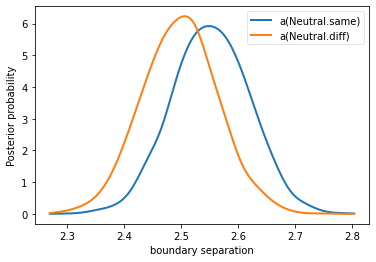

In [20]:
hddm.analyze.plot_posterior_nodes([a_same_neutral, a_diff_neutral],bins=20)
plt.xlabel('boundary separation')
plt.ylabel('Posterior probability')
print((a_same_neutral.trace()<a_diff_neutral.trace()).mean())

0.028368421052631577


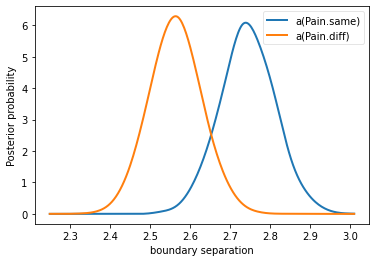

In [21]:
hddm.analyze.plot_posterior_nodes([a_same_pain, a_diff_pain],bins=20)
plt.xlabel('boundary separation')
plt.ylabel('Posterior probability')
print((a_same_pain.trace()<a_diff_pain.trace()).mean())

0.08563157894736842


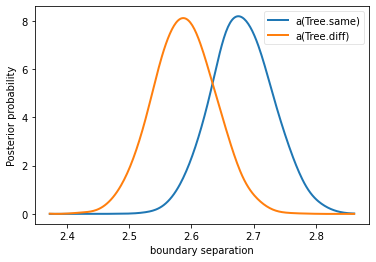

In [22]:
hddm.analyze.plot_posterior_nodes([a_same_tree, a_diff_tree],bins=20)
plt.xlabel('boundary separation')
plt.ylabel('Posterior probability')
print((a_same_tree.trace()<a_diff_tree.trace()).mean())